In [48]:
import numpy as np
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

%matplotlib inline

In [49]:
import matplotlib.pyplot as plt

In [50]:
from itertools import chain

In [60]:
simulator = QasmSimulator()

qreg = QuantumRegister(1, 'q')
creg = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg, creg)

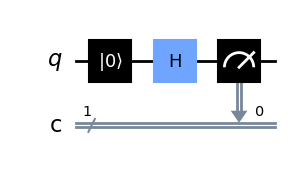

In [61]:
circuit.reset(qreg[0])
circuit.h(qreg[0])
circuit.measure(qreg[0], creg[0])
circuit.draw(output='mpl')

In [62]:
y0 = []
y1 = []

cont_zero = 0
cont_one = 0

for i in range(0, 100):
    circuit.measure(qreg[0], creg[0])

    compiled_circuit = transpile(circuit, simulator)
    job = simulator.run(compiled_circuit, shots=1000)

    result = job.result()

    if(i == 0):
        counts0 = result.get_counts(compiled_circuit)
    
    counts = result.get_counts(compiled_circuit)

    y0.append(counts['0']/1000)
    y1.append(counts['1']/1000)

    cont_zero = cont_zero + counts['0']/1000.0
    cont_one = cont_one + counts['1']/1000.0

In [63]:
print("\nTotal count for 0 and 1 are: ", counts)
print("\naverage probability value of obtaining a 0 qubit state is: ", cont_zero/100.0)
print("average probability value of obtaining a 1 qubit state is: ", cont_one/100.0)


Total count for 0 and 1 are:  {'0': 479, '1': 521}

average probability value of obtaining a 0 qubit state is:  0.49963999999999986
average probability value of obtaining a 1 qubit state is:  0.5003600000000001


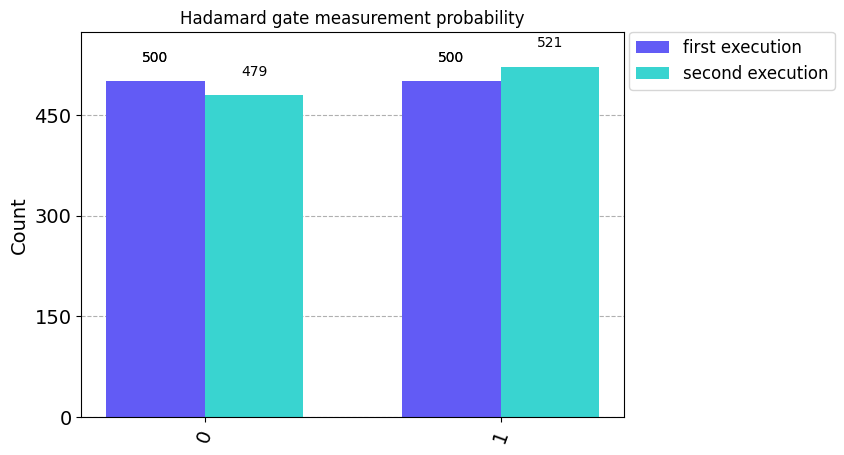

In [65]:
values = [counts0, counts]
legend = ["first execution", "second execution"]
color =["#625BF5", "#39D4D0"]

plot_histogram(values, legend=legend, color=color, title="Hadamard gate measurement probability")

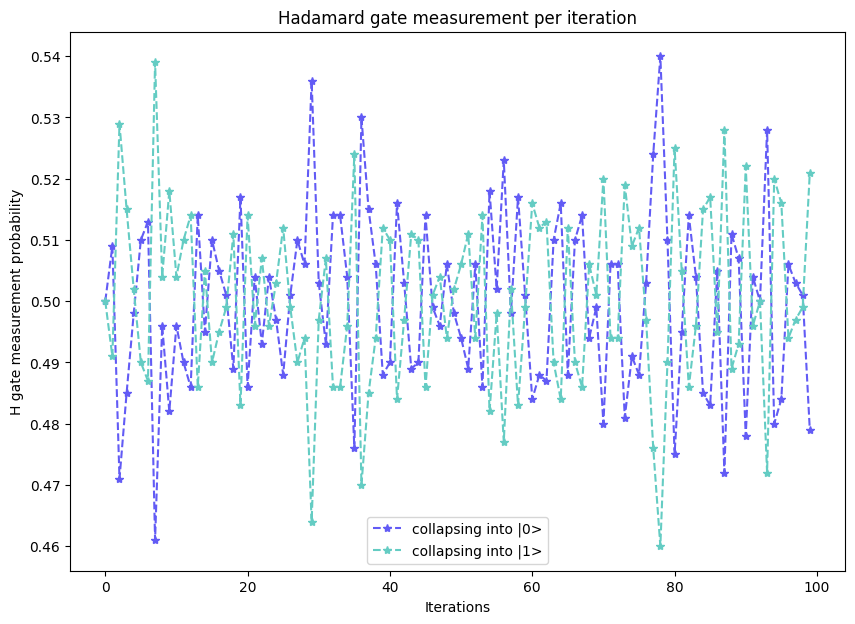

In [66]:
fig, ax = plt.subplots(figsize=(10, 7))

x = np.arange(0, len(y0))

ax.plot(x, y0, "--*", color="#625BF5", label="collapsing into |0>")
ax.plot(x, y1, "--*", color="#64CCC3", label="collapsing into |1>")

plt.title("Hadamard gate measurement per iteration")
plt.xlabel("Iterations")
plt.ylabel("H gate measurement probability")
plt.legend()

plt.show()